In [1]:
!python -m pip install --user --upgrade pip
!pip install --user keras
!pip install --user tensorflow
!pip install --user -U numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\d7\de\2e\efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
Successfully built gast absl-py termcolor wrapt


ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Requirement already up-to-date: numpy in c:\users\mayingzh\appdata\roaming\python\python36\site-packages (1.16.4)


In [3]:
# Use CPU only
# Only Macbook needs to run this cell
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data and do data normalization

In [2]:
df = pd.read_csv('Options_R.csv')
df.head()

,ticker,date,exdate,maturity,strike_price,best_offer,volatility,underlying_price,interest_rate,cp_flag_C,cp_flag_P
0,AXP,2013-01-02,2013-01-04,2,40.0,20.4,0.170513,58.75,0.0008,1,0
1,AXP,2013-01-02,2013-01-04,2,44.0,15.4,0.170513,58.75,0.0008,1,0
2,AXP,2013-01-02,2013-01-04,2,45.0,14.4,0.170513,58.75,0.0008,1,0
3,AXP,2013-01-02,2013-01-04,2,46.0,13.4,0.170513,58.75,0.0008,1,0
4,AXP,2013-01-02,2013-01-04,2,47.0,12.4,0.170513,58.75,0.0008,1,0


In [8]:
df = df[df['volatility'].notnull()]

In [9]:
y = df['best_offer'].values
X = df[['maturity', 'strike_price', 'underlying_price', 'volatility', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]

In [10]:
# Normalize the data to build a regression neural network model
sc= preprocessing.MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

(1079819, 7)
(1079819, 1)


In [13]:
XX_train, XX_validation, yy_train, yy_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Build a keras Sequential model

In [14]:
# Built Keras sequential model with 3 hidden layer, and after the first hidden layer.
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

W0703 20:54:55.305389  8584 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 20:54:55.320410  8584 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 20:54:55.325403  8584 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
# Enable early stopping based on the loss of validation data
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=25)

In [16]:
# Because it is a simple regression problem, we should custom metrics function
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [17]:
# use mean_squared_error to compile regression model loss
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)

W0703 20:55:01.351735  8584 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
# fit the model
result = model.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

W0703 20:55:04.486424  8584 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0703 20:55:04.570343  8584 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 863855 samples, validate on 215964 samples
Epoch 1/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.6444e-04 - rmse: 0.0056 - r_square: 0.9876 - val_loss: 2.5155e-05 - val_rmse: 0.0038 - val_r_square: 0.9981
Epoch 2/200
863855/863855 [==============================] - 4s 5us/step - loss: 2.3841e-05 - rmse: 0.0035 - r_square: 0.9982 - val_loss: 1.5990e-05 - val_rmse: 0.0029 - val_r_square: 0.9988
Epoch 3/200
863855/863855 [==============================] - 4s 5us/step - loss: 2.0503e-05 - rmse: 0.0032 - r_square: 0.9984 - val_loss: 1.7168e-05 - val_rmse: 0.0029 - val_r_square: 0.9987
Epoch 4/200
863855/863855 [==============================] - 4s 5us/step - loss: 1.8513e-05 - rmse: 0.0030 - r_square: 0.9986 - val_loss: 1.4049e-05 - val_rmse: 0.0024 - val_r_square: 0.9989
Epoch 5/200
863855/863855 [==============================] - 4s 5us/step - loss: 1.7200e-05 - rmse: 0.0029 - r_square: 0.9987 - val_loss: 1.4151e-05 - val_rmse: 0.0024 - val_r_square: 

863855/863855 [==============================] - 4s 5us/step - loss: 1.0667e-05 - rmse: 0.0021 - r_square: 0.9992 - val_loss: 1.0648e-05 - val_rmse: 0.0021 - val_r_square: 0.9992
Epoch 44/200
863855/863855 [==============================] - 4s 5us/step - loss: 1.0667e-05 - rmse: 0.0021 - r_square: 0.9992 - val_loss: 9.6013e-06 - val_rmse: 0.0019 - val_r_square: 0.9993
Epoch 45/200
863855/863855 [==============================] - 4s 5us/step - loss: 1.0657e-05 - rmse: 0.0021 - r_square: 0.9992 - val_loss: 1.0146e-05 - val_rmse: 0.0020 - val_r_square: 0.9992
Epoch 46/200
863855/863855 [==============================] - 4s 5us/step - loss: 1.0537e-05 - rmse: 0.0021 - r_square: 0.9992 - val_loss: 1.2308e-05 - val_rmse: 0.0024 - val_r_square: 0.9991
Epoch 47/200
863855/863855 [==============================] - 4s 5us/step - loss: 1.0641e-05 - rmse: 0.0021 - r_square: 0.9992 - val_loss: 1.0303e-05 - val_rmse: 0.0021 - val_r_square: 0.9992
Epoch 48/200
863855/863855 [=========================

Epoch 86/200
863855/863855 [==============================] - 4s 5us/step - loss: 9.7631e-06 - rmse: 0.0020 - r_square: 0.9993 - val_loss: 8.6737e-06 - val_rmse: 0.0019 - val_r_square: 0.9993
Epoch 87/200
863855/863855 [==============================] - 4s 5us/step - loss: 9.7618e-06 - rmse: 0.0020 - r_square: 0.9993 - val_loss: 1.2664e-05 - val_rmse: 0.0023 - val_r_square: 0.9990
Epoch 88/200
863855/863855 [==============================] - 4s 5us/step - loss: 9.6812e-06 - rmse: 0.0020 - r_square: 0.9993 - val_loss: 9.6972e-06 - val_rmse: 0.0019 - val_r_square: 0.9993
Epoch 89/200
863855/863855 [==============================] - 4s 5us/step - loss: 9.7085e-06 - rmse: 0.0020 - r_square: 0.9993 - val_loss: 1.1482e-05 - val_rmse: 0.0022 - val_r_square: 0.9991
Epoch 90/200
863855/863855 [==============================] - 4s 5us/step - loss: 9.7494e-06 - rmse: 0.0020 - r_square: 0.9993 - val_loss: 1.1944e-05 - val_rmse: 0.0022 - val_r_square: 0.9991
Epoch 91/200
863855/863855 [============

In [24]:
model.save_weights('model.h5')

In [19]:
predictions = model.predict(X_test)
pre_act = sc.inverse_transform(predictions)
print(pre_act[:10])

[[4.9878725e-01]
 [8.0572510e+00]
 [4.3696209e+01]
 [1.3325646e+01]
 [1.5871577e+00]
 [9.5909962e-04]
 [5.8215833e+00]
 [4.6672096e+00]
 [9.6788549e+00]
 [1.8222956e+01]]


In [20]:
y_act = sc.inverse_transform(y_test)

In [21]:
y_act[:10]

array([[3.400e-01],
       [7.600e+00],
       [4.435e+01],
       [1.425e+01],
       [1.760e+00],
       [3.000e-02],
       [5.500e+00],
       [4.500e+00],
       [9.350e+00],
       [1.795e+01]])

## Plot learning curves including R^2 and RMSE

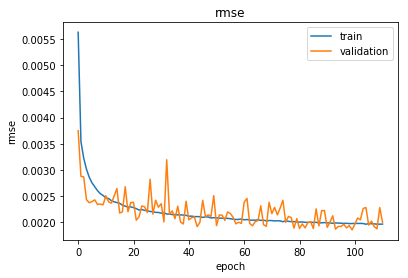

In [22]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

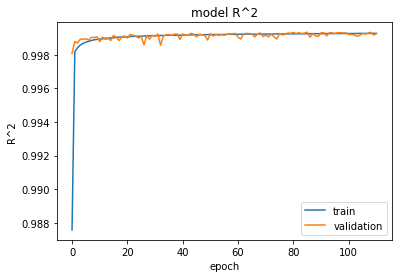

In [23]:
# plot training curve for R^2
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [24]:
import sklearn.metrics as skm, math
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act))



Mean absolute error (MAE):      0.277239
Mean squared error (MSE):       0.187401
Root mean squared error (RMSE): 0.432898
R square (R^2):                 0.999290


## Try dropout

In [25]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model2.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result2 = model2.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

W0703 21:07:57.700560  8584 deprecation.py:506] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 863855 samples, validate on 215964 samples
Epoch 1/200
863855/863855 [==============================] - 5s 6us/step - loss: 6.3613e-04 - rmse: 0.0129 - r_square: 0.9520 - val_loss: 1.5197e-04 - val_rmse: 0.0080 - val_r_square: 0.9887
Epoch 2/200
863855/863855 [==============================] - 5s 6us/step - loss: 5.7282e-05 - rmse: 0.0049 - r_square: 0.9957 - val_loss: 1.9159e-04 - val_rmse: 0.0076 - val_r_square: 0.9859
Epoch 3/200
863855/863855 [==============================] - 5s 6us/step - loss: 3.1524e-05 - rmse: 0.0037 - r_square: 0.9976 - val_loss: 2.2923e-04 - val_rmse: 0.0086 - val_r_square: 0.9831
Epoch 4/200
863855/863855 [==============================] - 5s 6us/step - loss: 2.6084e-05 - rmse: 0.0034 - r_square: 0.9980 - val_loss: 1.9561e-04 - val_rmse: 0.0080 - val_r_square: 0.9856
Epoch 5/200
863855/863855 [==============================] - 5s 6us/step - loss: 2.3394e-05 - rmse: 0.0032 - r_square: 0.9982 - val_loss: 2.4516e-04 - val_rmse: 0.0088 - val_r_square: 

In [26]:
predictions2 = model2.predict(X_test)
pre_act2 = sc.inverse_transform(predictions2)
print(pre_act2[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act2))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act2))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act2)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act2))

[[ 0.84491634]
 [ 6.4803762 ]
 [40.58042   ]
 [11.621701  ]
 [ 1.5075382 ]
 [ 0.09726154]
 [ 5.584685  ]
 [ 4.2508855 ]
 [ 8.1683655 ]
 [16.12794   ]]


Mean absolute error (MAE):      1.070542
Mean squared error (MSE):       3.806763
Root mean squared error (RMSE): 1.951093
R square (R^2):                 0.985587


## Try batch normalization technique to regularize neurons

In [27]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential([
    BatchNormalization(),
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model3.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result3 = model3.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

Train on 863855 samples, validate on 215964 samples
Epoch 1/200
863855/863855 [==============================] - 5s 6us/step - loss: 4.4561e-04 - rmse: 0.0133 - r_square: 0.9662 - val_loss: 6.8910e-05 - val_rmse: 0.0056 - val_r_square: 0.9948
Epoch 2/200
863855/863855 [==============================] - 5s 6us/step - loss: 2.5730e-04 - rmse: 0.0097 - r_square: 0.9807 - val_loss: 6.6448e-05 - val_rmse: 0.0060 - val_r_square: 0.9950
Epoch 3/200
863855/863855 [==============================] - 5s 6us/step - loss: 2.1984e-04 - rmse: 0.0089 - r_square: 0.9834 - val_loss: 4.8273e-05 - val_rmse: 0.0051 - val_r_square: 0.9963
Epoch 4/200
863855/863855 [==============================] - 5s 6us/step - loss: 2.2071e-04 - rmse: 0.0087 - r_square: 0.9834 - val_loss: 4.2584e-05 - val_rmse: 0.0050 - val_r_square: 0.9968
Epoch 5/200
863855/863855 [==============================] - 5s 6us/step - loss: 2.1969e-04 - rmse: 0.0086 - r_square: 0.9835 - val_loss: 3.7960e-05 - val_rmse: 0.0043 - val_r_square: 

863855/863855 [==============================] - 5s 5us/step - loss: 1.8851e-04 - rmse: 0.0078 - r_square: 0.9858 - val_loss: 7.0527e-05 - val_rmse: 0.0047 - val_r_square: 0.9947
Epoch 44/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.8842e-04 - rmse: 0.0078 - r_square: 0.9857 - val_loss: 1.8592e-05 - val_rmse: 0.0026 - val_r_square: 0.9986
Epoch 45/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.8761e-04 - rmse: 0.0077 - r_square: 0.9859 - val_loss: 5.1962e-05 - val_rmse: 0.0041 - val_r_square: 0.9961
Epoch 46/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.8646e-04 - rmse: 0.0077 - r_square: 0.9859 - val_loss: 1.9350e-05 - val_rmse: 0.0031 - val_r_square: 0.9985
Epoch 47/200
863855/863855 [==============================] - 5s 6us/step - loss: 1.8911e-04 - rmse: 0.0078 - r_square: 0.9858 - val_loss: 3.2271e-05 - val_rmse: 0.0041 - val_r_square: 0.9976
Epoch 48/200
863855/863855 [=========================

Epoch 86/200
863855/863855 [==============================] - 5s 6us/step - loss: 1.8529e-04 - rmse: 0.0077 - r_square: 0.9861 - val_loss: 3.0196e-05 - val_rmse: 0.0040 - val_r_square: 0.9977
Epoch 87/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.8795e-04 - rmse: 0.0078 - r_square: 0.9858 - val_loss: 3.5633e-05 - val_rmse: 0.0038 - val_r_square: 0.9973
Epoch 88/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.8740e-04 - rmse: 0.0077 - r_square: 0.9859 - val_loss: 3.3265e-05 - val_rmse: 0.0033 - val_r_square: 0.9975
Epoch 89/200
863855/863855 [==============================] - 5s 6us/step - loss: 1.8283e-04 - rmse: 0.0077 - r_square: 0.9861 - val_loss: 4.9943e-05 - val_rmse: 0.0038 - val_r_square: 0.9963
Epoch 90/200
863855/863855 [==============================] - 5s 5us/step - loss: 1.8504e-04 - rmse: 0.0077 - r_square: 0.9861 - val_loss: 2.7448e-05 - val_rmse: 0.0033 - val_r_square: 0.9979
Epoch 91/200
863855/863855 [============

In [28]:
predictions3 = model3.predict(X_test)
pre_act3 = sc.inverse_transform(predictions3)
print(pre_act3[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act3))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act3))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act3)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act3))

[[ 3.6824301e-01]
 [ 7.1230826e+00]
 [ 4.2358734e+01]
 [ 1.2410133e+01]
 [ 1.6438693e+00]
 [-2.8274857e-02]
 [ 5.0302896e+00]
 [ 3.9520421e+00]
 [ 8.2271948e+00]
 [ 1.7088663e+01]]


Mean absolute error (MAE):      0.470328
Mean squared error (MSE):       0.670427
Root mean squared error (RMSE): 0.818796
R square (R^2):                 0.997462


## Reference: 
&emsp;&emsp;What does 'Accuracy' mean in Regression? https://github.com/keras-team/keras/issues/7947 <br>
&emsp;&emsp;https://keras.io/metrics/<br>
&emsp;&emsp;Scale, Standardize, or Normalize with Scikit-Learn https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 <br>
&emsp;&emsp;The Day my Computer Won the Nobel Prize (Neural Network Option Pricing)  https://medium.com/datadriveninvestor/the-day-my-computer-won-the-nobel-prize-neural-network-option-pricing-d29b4379f1d2 <br>